<a href="https://colab.research.google.com/github/gitboku/statistics-practice/blob/master/%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 重回帰分析とは何か

参考：　https://to-kei.net/basic-study/regression/multiple-regression-analysis/

成人の身長を例にする。

身長を目的変数を$y$、体重と年齢を説明変数$x_1, x_2$とする。  
すると、以下のようにあらわせる。

$$
y = a_1x_1 + a_2x_2 + b
$$

$a$は偏回帰係数と呼ばれ、$a_i$は最小二乗法によって求められる。

## 標準化偏回帰係数

標準化偏回帰係数とは各変数の重要度を表す指標であり、大小を比較することでどの変数が重要なのかを測る。  
例えば、体重を㎏でデータを取得した時と、ｇで取得した時では偏回帰係数に1000倍の差が出てしまうが、標準化偏回帰係数なら単位に関わらず各説明変数の影響の大きさを測ることができる。

目的変数yの標準偏差を$SD(y)$、説明変数xの標準偏差を$SD(x)$とすると、標準化偏回帰係数Aは以下のようにあらわす。

$$
A_i = a_i\frac {SD(x_i)} {SD(y)}
$$

## ダミー変数

「性別」のような数字で表せないカテゴリー変数を{0, 1}に変換したものをダミー変数という。  
2種類の値を持つデータ（例えば男と女）では0または1で表す。  
3変数以上の場合は変数n個に対してn-1個の列を用いることで表せる。  
例えば、｛白人、黒人、アジア人｝の3つの値を取るときは、「白人」「黒人」の二つの列を用意し、「両方0ならアジア人」というようにして表す。

## 説明変数を選ぶ注意点



*   説明変数同士の相関係数は低く抑える。
*   現在のデータに対する説明力を考えるときは決定係数を、新たなデータに対する予測力を考えるときはAIC（赤池情報量基準）を用いるといい。



## 決定係数

パラメータ推定に使用したデータに対して推定された回帰式の当てはまりの良さを表す。  
「寄与率」ともいう。  
一般には$R^2$で表され、回帰変動$S_R$を全体変動$S_T$で割った値である。  
0から1の値を取り、1に近いほどデータに当てはまっている。

$$
\begin{eqnarray}
R^2 &=& \frac{S_R}{S_T} = 1 - \frac {\displaystyle \sum_{i = 1}^n {\left(y_i - \hat{y} \right)}^2}{\displaystyle \sum_{i = 1}^n {\left(y_i - \overline{y} \right)}^2} \\
S_R &=& \displaystyle \sum_{i = 1}^n {\left(\hat{y}_i - \overline{y} \right)}^2\\
S_T &=& \displaystyle \sum_{i = 1}^n {\left(y_i - \overline{y} \right)}^2 
\end{eqnarray}
$$

$\hat{y}_i$は回帰式から推定されたデータ、$y_i$は実際のデータ、$\overline{y}$は実際のデータの平均。

重回帰分析では変数が増えるほど無条件で1に近づいてしまうので、代わりに「自由度修正済み決定係数」を使用する。

## 自由度調整済み決定係数

$R_f^2$で表す。  
データ数をN、説明変数の数をpとすると、以下のようになる。

$$
R_f^2 = 1 - \frac {\frac{1}{N - p - 1} \displaystyle \sum_{i = 1}^n {\left(y_i - \hat{y} \right)}^2}{\frac{1}{N - 1} \displaystyle \sum_{i = 1}^n {\left(y_i - \overline{y} \right)}^2}
$$

このほかにAIC（赤池情報量基準）を用いてもよい。

# どのようにしてパラメータを求めるのか

参考：　https://tutorials.chainer.org/ja/07_Regression_Analysis.html

### Step1 モデル決定

重回帰分析のモデルは基本的に以下のようになる。

$$
\begin{eqnarray}
y &=& w_1x_1 + w_2x_2 + ... + w_mx_m + b\\
&=& \displaystyle \sum_{m = 1}^M w_mx_m + b
\end{eqnarray}
$$

バイアスbについて考える。

重回帰分析ではMこのパラメータと1つのバイアスが存在するので、パラメータ数はM+1個。これらのパラメータをうまく定式化するため、$x_0 = 1, w_0 = b$とすることで、以下のように書き換えることができる。

$$
\begin{eqnarray}
y &=& \displaystyle \sum_{m = 0}^M w_mx_m
\end{eqnarray}
$$

これでバイアスbまで含めて行列計算で簡単に扱える。

この式をベクトルの内積で表記しなおす。

$$
\begin{eqnarray}
y &=& w_0x_0 + w_1x_1 + w_2x_2 + ... + w_mx_m\\
&=& [w_0 \  w_1\ \cdots\ w_M]\left[
    \begin{array}{c}
      x_0 \\
      x_1 \\
      \vdots \\
      x_M
    \end{array}
  \right]\\
&=& w^Tx
\end{eqnarray}
$$

### Step2 目的関数を決める

単回帰分析と同様に「（実際のデータ - 推定値）の合計」を目的関数とする

$$
\begin{eqnarray}
L &=& (t_1 - y_1)^2 + \cdots + (t_N - y_N)^2\\
&=& [y_1-y_1\ \cdots\ t_N-y_N]\left[
    \begin{array}{c}
      t_1-y_1 \\
      \vdots \\
      t_N-y_N
    \end{array}
  \right]\\
&=& (t-y)^T(t-y)
\end{eqnarray}
$$

ここで、内積の交換法則を利用してモデルの方程式$y = w^Tx$を以下のように変形する。

$$
\begin{eqnarray}
y = \left[\begin{array}{c}
      y_1 \\
      \vdots \\
      y_N
    \end{array}
  \right] = \left[\begin{array}{c}
      x_1^Tw \\
      \vdots \\
      x_N^Tw
    \end{array}
  \right] = \left[\begin{array}{c}
      x_1^T \\
      \vdots \\
      x_N^T
    \end{array}
  \right]w
\end{eqnarray}
$$

ここで、$x_n^T$はそれ一つ一つがベクトルである。

$$
x_n^T = [x_{n0}\ \cdots\ x_{nM}](n = 1, \cdots, N)
$$

なので、yは以下のように書ける。

$$
y = \left[
    \begin{array}{ccc}
      x_{10} & \cdots & x_{1M} \\
      \vdots & \ddots & \vdots \\
      x_{N0} & \cdots & x_{NM}
    \end{array}
  \right]\left[
    \begin{array}{ccc}
      w_0 \\
      \vdots \\
      w_M
    \end{array}
  \right] = Xw
$$

ここで、大きさがN行M列の行列Xは各行が各データ、各列が各入力変数（説明変数）を表しており、これをデザイン行列（design matrix）と呼ぶ。

デザイン行列の一番左の列はバイアスであるため、すべて1である。

### Step3 パラメータを最適化

単回帰分析と同様、目的関数をパラメータで微分して0とおき、wについて解く。

まず、目的関数$L = (t-y)^T(t-y)$を$y = Xw$を利用して置き換える。

$$
\begin{eqnarray}
L &=& (t-y)^T(t-y)\\
 &=& (t-Xw)^T(t-Xw)\\
 &=& \{t^T - (Xw)^T\}(t-Xw)\\
 &=& (t^T - t^TX^T)(t-Xw)
\end{eqnarray}
$$

この式を展開する

$L = t^Tt - t^TXw - w^TX^Tt + w^TX^TXw$

---
$t^TXw$はスカラーとなるため、$(t^TXw)^T = t^TXw$が成り立つ。

さらに、転地の公式$(ABC)^T = C^TB^TA^T$により、$(t^TXw)^T = w^TX^Tt$が成り立つ。

よって、上記二つの式により、以下が成り立つ。

$$
t^TXw = w^TX^Tt
$$

この式で目的関数を第3項を入れ替えることにより、目的関数を以下のように書き直す。

$$
L = t^Tt - 2t^TXw + w^TX^TXw
$$

偏微分しやすくするため、w以外の定数項を一つにまとめる。

$$
\begin{eqnarray}
L &=& t^T - 2t^TXw + w^TX^TXw\\
&=& t^Tt - 2(X^Tt)^Tw + w^TX^TXw\\
\end{eqnarray}
$$

さらに、見やすくするためにw以外を以下のように書き換える。

$$
\begin{eqnarray}
A &=& X^TX\\
b &=& -2X^Tt\\
c &=& t^Tt
\end{eqnarray}
$$
すると以下のようになる。
$$L = c + b^Tw + w^TAw$$

この目的関数Lを最小にするパラメータwを考える。

この目的関数はwについての2次関数になっている（途中式は省略するが、A, b, cに具体的な数値を入れて計算すると、wの2次関数になる）

wはM個の目的変数のベクトルなので、以下のM＋1個の連立方程式を解く必要がある。

$$
\begin{eqnarray}
    \begin{cases}
      \frac {\partial}{\partial w_0}L = 0 \\
      \vdots \\
      \frac {\partial}{\partial w_M}L = 0
    \end{cases}
\end{eqnarray}
$$

これをベクトルを用いて表記すると以下のようになる。

$$
\left[\begin{array}{c}
      \frac {\partial}{\partial w_0}L \\
      \vdots \\
      \frac {\partial}{\partial w_M}L
    \end{array}
\right] = \left[\begin{array}{c}
      0 \\
      \vdots \\
      0
    \end{array}
\right]
$$

上記の式をwについて解くため、以下のような変形を行う。

$$
\begin{eqnarray}
\frac {\partial}{\partial w}L &=& \frac {\partial}{\partial w}(c + b^Tw + w^TAw)\\
&=& \frac {\partial}{\partial w}(c) + \frac {\partial}{\partial w}(b^Tw) + \frac {\partial}{\partial w}(w^TAw)\\
&=& 0 + b^T + w^T(A + A^T)
\end{eqnarray}
$$

これを0と置き、A、bを入れ替え前に戻す

$$
\begin{eqnarray}
-2(X^Tt)^T + w^T\{X^TX + (X^TX)^T\} &=& 0\\
-2t^TX + 2w^TX^TX &=& 0\\
w^TX^TX &=& t^TX
\end{eqnarray}
$$

この両辺を転地して、転地の公式により$w^T$の転地を直す。

$$
\begin{eqnarray}
(w^TX^TX)^T &=& (t^TX)^T\\
X^TXw &=& X^Tt
\end{eqnarray}
$$

ここで、$X^TX$に逆行列が存在すると仮定して、両辺に左側から$(X^TX)^{-1}$をかける（※$I$は単位行列）

$$
\begin{eqnarray}
(X^TX)^{-1}X^TXw &=& (X^TX)^{-1}X^Tt\\
Iw &=& (X^TX)^{-1}X^Tt\\
w &=& (X^TX)^{-1}X^Tt
\end{eqnarray}
$$

# 実装

In [0]:
import numpy as np
import pandas as pd

## データ用意

In [0]:
# 元からあったsample_dataを使用する
csv = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [0]:
households = csv['households']
population = csv['population']
total_rooms = csv['total_rooms']

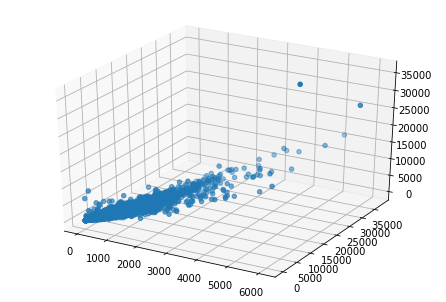

In [0]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d.axes3d import Axes3D

# TODO: 3Dの散布図がマウスドラッグできないのでどうにかする

fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(households, total_rooms, population)
pyplot.show()

目的変数をpopulation、説明変数をtotal_roomsとhouseholdsとする。  
この変数選択が分析として正しいのかどうかはいったん不問とする。

## パラメータ推定

In [0]:
# 説明変数の行列を用意する
bias = np.ones(total_rooms.size, dtype='int16')
total_rooms_np = np.array(total_rooms, dtype='int16')
households_np = np.array(households, dtype='int16')
X = np.matrix([bias, total_rooms, households]).T

In [5]:
population_np = np.matrix(population, dtype='int16') # shape = (1, 17000)
w = np.linalg.inv(X.T * X) * X.T * population_np.T # population_npは転地して縦ベクトルにする
w.shape

(3, 1)

In [0]:
w

matrix([[1.18421072e+02],
        [8.18679575e-02],
        [2.17641391e+00]])

## 学習結果描画

In [0]:
# パラメータを基にpopulationの推定値を出す。
pred_population = []
for x in X:
  pred_population.append(w[0] * x.item(0, 0) + w[1] * x.item(0, 1) + w[2] * x.item(0, 2))
pred_population_np = np.array(pred_population).reshape(len(pred_population),)

In [0]:
print('household: ', households.shape)
print('total_rooms: ', total_rooms.shape)
print('pred_population_np: ', pred_population_np.shape)

household:  (17000,)
total_rooms:  (17000,)
pred_population_np:  (17000,)


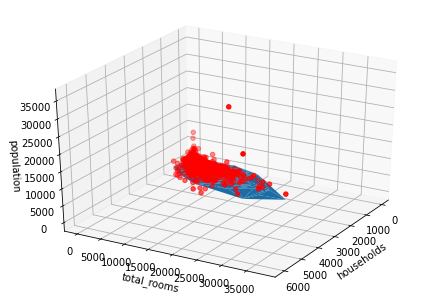

In [0]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(households, total_rooms, population, c='red')

ax.set_xlabel('households')
ax.set_ylabel('total_rooms')
ax.set_zlabel('population')

ax.plot_trisurf(
    households,
    total_rooms,
    pred_population_np)
ax.view_init(30, 30) # TODO: 見づらいので、図をマウスドラッグで回転できるようにする
plt.show()

## 自由度調整済みの決定係数を求める

In [11]:
population_list = population.to_list()
diff = [l1 - l2 for (l1, l2) in zip(population_list, pred_population)]
sum1 = 0
for d in diff:
  sum1 += d ** 2

numerator = sum1 / (len(population) - 2 - 1)

sum2 = 0
for p in population:
  sum2 += (p - population.mean()) ** 2

denominator = sum2 / (len(population) - 1)

R2 = 1 - (numerator / denominator)
print('R2 = ', R2)

R2 =  [[0.82918743]]


# scikit-learnで重回帰分析を行う

In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [0]:
# 元からあったsample_dataを使用する
csv = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [0]:
households = csv['households']
population = csv['population']
total_rooms = csv['total_rooms']

In [0]:
bias = np.ones(total_rooms.size, dtype='int16')
X = np.array([bias, households, total_rooms]).T

In [0]:
model_lr = LinearRegression()
model_lr.fit(X, population)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
model_lr.coef_

array([0.        , 2.28074306, 0.08320213])

In [0]:
# パラメータを基にpopulationの推定値を出す。
pred_population = []
for x in X:
  pred_population.append(model_lr.coef_[0] * x[0] + model_lr.coef_[1] * x[1] + model_lr.coef_[2] * x[2])
pred_population_np = np.array(pred_population).reshape(len(pred_population),)

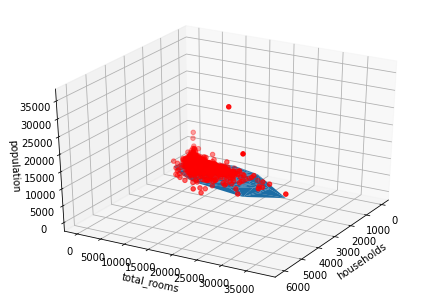

In [0]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(households, total_rooms, population, c='red')

ax.set_xlabel('households')
ax.set_ylabel('total_rooms')
ax.set_zlabel('population')

ax.plot_trisurf(
    households,
    total_rooms,
    pred_population_np)
ax.view_init(30, 30) # TODO: 見づらいので、図をマウスドラッグで回転できるようにする
plt.show()